In [5]:
# Import Libraries 
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [7]:
# Styles
%matplotlib inline
sns.set() # for plot Styling
plt.rcParams['figure.figsize']=(16,9)
pd.set_option('display.width',2000)

In [10]:
# Load Data Set 
os.chdir('C:\\Users\\nikhil reddy\\Downloads\\Day15\\Day15\\')
data = pd.read_csv('movie_metadata.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


# Data Checks 

In [11]:
data.shape

(5043, 28)

In [12]:
data.groupby('country').size()

country
49                         5
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 66, dtype: int64

In [13]:
data.groupby('language').size()

language
49              12
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64

In [14]:
data[['director_name','director_facebook_likes']]
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'], dtype='object')

# Data For clustering 

In [15]:
newdata=data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


# Create the Model 

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [17]:
# Cluster Details 
kmeans.cluster_centers_
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [18]:
# Cluster Labels and count 
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}


C:\Users\nikhil reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhil reddy\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


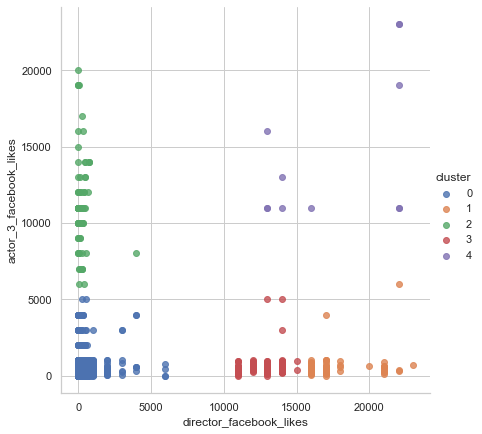

In [23]:
# Plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes',data=newdata, hue='cluster',size=6,fit_reg=False)

# K Means Clustering  - Mall Customers – Spending Score 

In [24]:
os.chdir('C:\\Users\\nikhil reddy\\Downloads\\Day15\\Day15\\')
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
# Create X Variable 
x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss    

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25011.920255473764,
 21850.16528258562,
 19794.559507517566]

Text(0, 0.5, 'wcss')

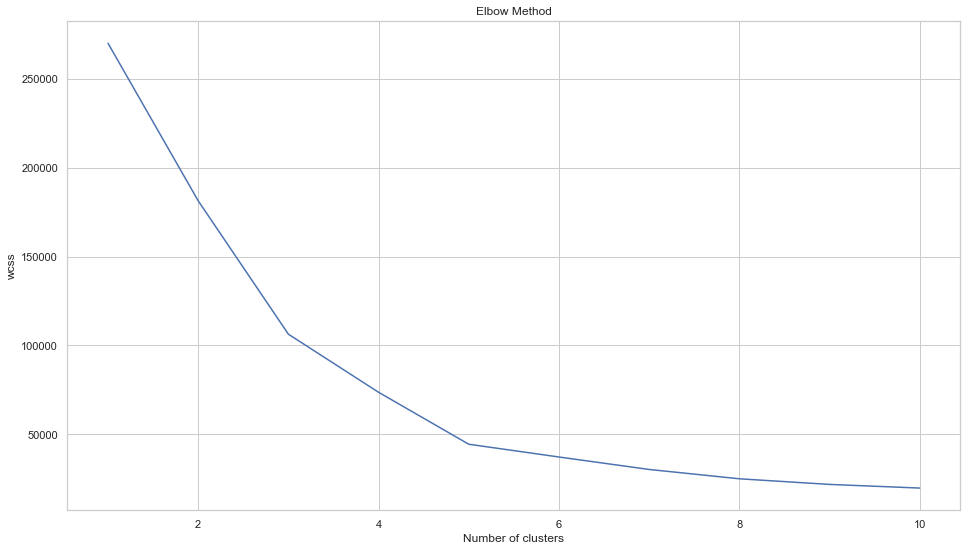

In [31]:
# Create a Line Graph with WCSS (Sum of distances) 
plt.plot (range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')

In [32]:
# Create the Model and predictions 
kmeans =  KMeans (n_clusters =  5 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

# Create Clusters 

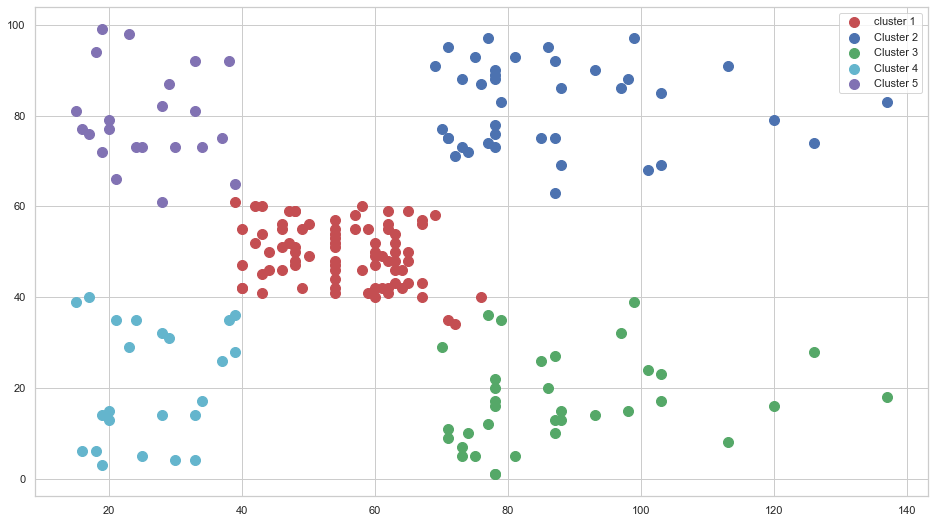

In [35]:
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'cluster 1')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100, c='m', label = 'Cluster 5')
plt.legend()